In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(10000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

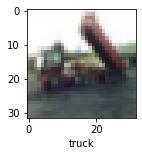

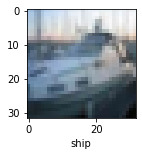

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train,y_train,2)
plot_sample(X_test,y_test,2)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4600 - accuracy: 0.4740
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1098 - accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9714 - accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8908 - accuracy: 0.6937
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8218 - accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7670 - accuracy: 0.7344
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7114 - accuracy: 0.7534
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6641 - accuracy: 0.7710
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6225 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9290 - accuracy: 0.7038


[0.92899489402771, 0.7038000226020813]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:10]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

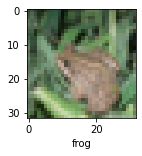

In [ ]:
plot_sample(X_test,y_test,4)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(layers.Conv3D(32,(3,3,3),activation='relu',input_shape=(32,32,32,3),bias_initializer=Constant(0.01)))
model.add(layers.Conv3D(32,(3,3,3),activation='relu',bias_initializer=Constant(0.01)))
model.add(layers.MaxPooling3D((2,2,2)))
model.add(layers.Conv3D(64,(3,3,3),activation='relu'))
model.add(layers.Conv3D(64,(2,2,2),activation='relu'))
model.add(layers.MaxPooling3D((2,2,2)))
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(256,'relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128,'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_9 (Conv3D)           (None, 30, 30, 30, 32)    2624      
                                                                 
 conv3d_10 (Conv3D)          (None, 28, 28, 28, 32)    27680     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 14, 14, 14, 32)   0         
 3D)                                                             
                                                                 
 conv3d_11 (Conv3D)          (None, 12, 12, 12, 64)    55360     
                                                                 
 conv3d_12 (Conv3D)          (None, 11, 11, 11, 64)    32832     
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 5, 5, 5, 64)      0         
 3D)                                                  

In [ ]:
model.compile(Adam(0.001),'categorical_crossentropy',['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_data=(X_test,y_test),callbacks=[EarlyStopping(patience=15)])

Epoch 1/20


ValueError: ignored